In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Polarization Curves - 01/31/2024

Taking the most stable values of measured current and voltage after running the cell over a fixed resistance for a "long" amount of time

Measured the potential across the battery

In [2]:
runs_to_resistance_1_31 = {'Run5':510, 'Run6':100, 'Run7':51, 'Run8':22, 'Run9':10}
voltage_cell_1_31 = pd.DataFrame(data={'Run':runs_to_resistance_1_31.keys(),
                                       'Resistance (Ohms)':runs_to_resistance_1_31.values(),
                                       'Voltage (V)':[1.391,1.333,1.303,1.1666,0.963]})
voltage_cell_1_31['Current (Amps)'] = voltage_cell_1_31['Voltage (V)'] / voltage_cell_1_31['Resistance (Ohms)']
voltage_cell_1_31['Current (mA)'] = voltage_cell_1_31['Current (Amps)'] * 1000
current_cell_1_31 = pd.DataFrame(data={'Run':runs_to_resistance_1_31.keys(),
                                       'Resistance (Ohms)':runs_to_resistance_1_31.values(),
                                       'Current (Amps)':[0.0027,0.0136,0.0251,0.05339,0.09302]})
current_cell_1_31['Current (mA)'] = current_cell_1_31['Current (Amps)'] * 1000
current_cell_1_31['Voltage (V)'] = current_cell_1_31['Current (Amps)'] * current_cell_1_31['Resistance (Ohms)']

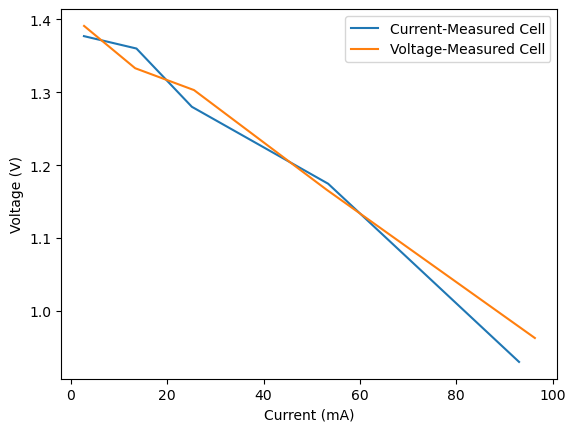

In [3]:
sns.lineplot(data=current_cell_1_31, x='Current (mA)', y='Voltage (V)', label='Current-Measured Cell')
sns.lineplot(data=voltage_cell_1_31, x='Current (mA)', y='Voltage (V)', label='Voltage-Measured Cell');

In [4]:
# Regression to find the internal resistance, assuming this is the Ohmic losses region (since it is so linear!)
from sklearn.linear_model import LinearRegression

model_1_31_voltage = LinearRegression()
model_1_31_voltage.fit(voltage_cell_1_31[['Current (Amps)']], voltage_cell_1_31[['Voltage (V)']])
predictions_1_31_voltage = model_1_31_voltage.predict(voltage_cell_1_31[['Current (Amps)']])
slope_1_31_voltage, intercept_1_31_voltage = model_1_31_voltage.coef_[0][0], model_1_31_voltage.intercept_[0]
Rint_1_31_voltage = -slope_1_31_voltage


model_1_31_current = LinearRegression()
model_1_31_current.fit(current_cell_1_31[['Current (Amps)']], current_cell_1_31[['Voltage (V)']])
predictions_1_31_current = model_1_31_current.predict(current_cell_1_31[['Current (Amps)']])
slope_1_31_current, intercept_1_31_current = model_1_31_current.coef_[0][0], model_1_31_current.intercept_[0]
Rint_1_31_current = -slope_1_31_current

print('Internal Resistance Voltage Cell:',np.round(Rint_1_31_voltage,3),'Ohms \nInternal Resistance Current Cell:',np.round(Rint_1_31_current,3),'Ohms')

Internal Resistance Voltage Cell: 4.554 Ohms 
Internal Resistance Current Cell: 5.002 Ohms


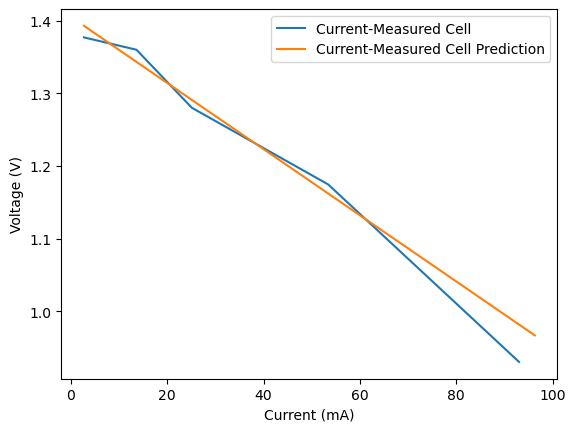

In [5]:
sns.lineplot(data=current_cell_1_31, x='Current (mA)', y='Voltage (V)', label='Current-Measured Cell')
plt.plot(voltage_cell_1_31[['Current (mA)']], predictions_1_31_voltage, label='Current-Measured Cell Prediction')
plt.legend();

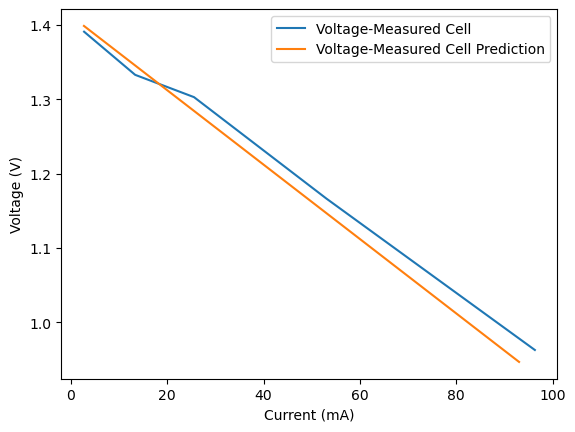

In [6]:
sns.lineplot(data=voltage_cell_1_31, x='Current (mA)', y='Voltage (V)', label='Voltage-Measured Cell')
plt.plot(current_cell_1_31[['Current (mA)']], predictions_1_31_current, label='Voltage-Measured Cell Prediction')
plt.legend();

# Polarization Curves - 02/07/2024

Taking the most stable values of measured current and voltage after running the cell over a fixed resistance for a "long" amount of time

Measured the potential across the battery

In [7]:
runs_to_resistance_2_17 = {'Run1':1500, 'Run2':680, 'Run3':560, 'Run4':470, 'Run5':330, 'Run6':220, 'Run7':150, 'Run8':120, 'Run9':51, 'Run10':33, 'Run11':22}
voltage_cell_2_17 = pd.DataFrame(data={'Run':runs_to_resistance_2_17.keys(),
                                       'Resistance (Ohms)':runs_to_resistance_2_17.values(),
                                       'Voltage (V)':[(1.477+1.462)/2, 1.427, (1.417+1.403+1.412+1.407)/4, (1.388+1.393+1.398+1.403)/4, (1.398+1.383+1.388+1.393)/4,(1.364+1.354+1.373+1.359+1.364)/5, (1.354+1.344+1.339)/3, (1.329+1.334+1.339)/3, 1.29, (1.227+1.231+1.236+1.241)/4, (1.192+1.197+1.207+1.212)/4]})
voltage_cell_2_17['Current (Amps)'] = voltage_cell_2_17['Voltage (V)'] / voltage_cell_2_17['Resistance (Ohms)']
voltage_cell_2_17['Current (mA)'] = voltage_cell_2_17['Current (Amps)'] * 1000
current_cell_2_17 = pd.DataFrame(data={'Run':runs_to_resistance_2_17.keys(),
                                       'Resistance (Ohms)':runs_to_resistance_2_17.values(),
                                       'Current (Amps)':[0.001, (0.0021+0.0018)/2, 0.0024, (0.0027+0.0031)/2, (0.0043+0.0040)/2, 0.0062, (0.0087+0.0090)/2, (0.0111+0.0108)/2, 0.0249, (0.0367+0.0370)/2, 0.0535]})
current_cell_2_17['Current (mA)'] = current_cell_2_17['Current (Amps)'] * 1000
current_cell_2_17['Voltage (V)'] = current_cell_2_17['Current (Amps)'] * current_cell_2_17['Resistance (Ohms)']


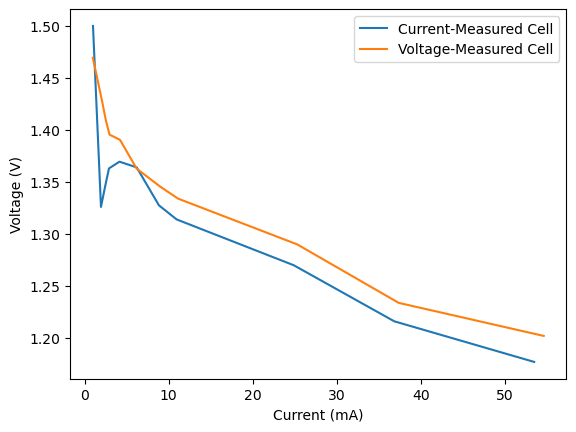

In [8]:
sns.lineplot(data=current_cell_2_17, x='Current (mA)', y='Voltage (V)', label='Current-Measured Cell')

sns.lineplot(data=voltage_cell_2_17, x='Current (mA)', y='Voltage (V)', label='Voltage-Measured Cell');

# Polarization Curves - 02/14/2024

Measured the potential across the resistor - resulted in easier-to-see stabilization of potential (or so we thought, not actually though)

In [9]:
resistances = [1500,510,330,220,150,120,51,33,22]
runs_to_resistance_2_14 = dict(zip(np.array(['Run'+str(i) for i in np.arange(1,len(resistances)+1)]), resistances))
both_cell_2_14 = pd.DataFrame(data={'Run':runs_to_resistance_2_14.keys(),
                                       'Resistance (Ohms)':runs_to_resistance_2_14.values(),
                                       'Voltage (V)':[1.414, 1.394, 1.379, 1.365, 1.345, 1.311, 1.252, 1.198, 1.120],
                                    'Current (A)':[0.0001, (0.0014+0.0017)/2, 0.0030, 0.0051, 0.0076, 0.0098, 0.0232, 0.0350, 0.0506]})
both_cell_2_14['Current (mA)'] = both_cell_2_14['Current (A)'] * 1000
both_cell_2_14['Calc Current (mA)'] = both_cell_2_14['Voltage (V)'] / both_cell_2_14['Resistance (Ohms)'] * 1000
both_cell_2_14['Calc Voltage (V)'] = both_cell_2_14['Current (A)'] * both_cell_2_14['Resistance (Ohms)']
voltage_only_cell_2_14 = pd.DataFrame(data={'Run':runs_to_resistance_2_14.keys(),
                                       'Resistance (Ohms)':runs_to_resistance_2_14.values(),
                                       'Voltage (V)':[1.408, 1.385, 1.371, 1.356, 1.337, 1.312, 1.248, 1.199, 1.116]})
voltage_only_cell_2_14['Current (A)'] = voltage_only_cell_2_14['Voltage (V)'] / voltage_only_cell_2_14['Resistance (Ohms)']
voltage_only_cell_2_14['Current (mA)'] = voltage_only_cell_2_14['Current (A)'] * 1000

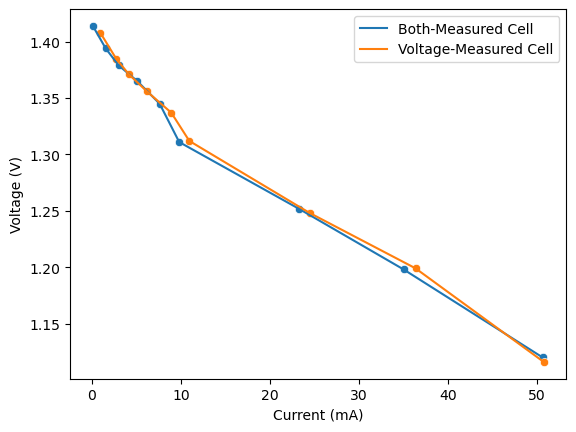

In [10]:
sns.lineplot(data=both_cell_2_14, x='Current (mA)', y='Voltage (V)', label='Both-Measured Cell')
sns.scatterplot(data=both_cell_2_14, x='Current (mA)', y='Voltage (V)')
sns.lineplot(data=voltage_only_cell_2_14, x='Current (mA)', y='Voltage (V)', label='Voltage-Measured Cell')
sns.scatterplot(data=voltage_only_cell_2_14, x='Current (mA)', y='Voltage (V)');

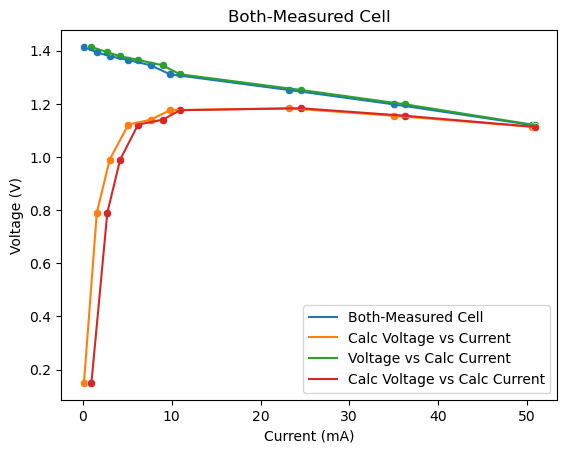

In [11]:
sns.lineplot(data=both_cell_2_14, x='Current (mA)', y='Voltage (V)', label='Both-Measured Cell')
sns.scatterplot(data=both_cell_2_14, x='Current (mA)', y='Voltage (V)')
sns.lineplot(data=both_cell_2_14, x='Current (mA)', y='Calc Voltage (V)', label='Calc Voltage vs Current')
sns.scatterplot(data=both_cell_2_14, x='Current (mA)', y='Calc Voltage (V)')
sns.lineplot(data=both_cell_2_14, x='Calc Current (mA)', y='Voltage (V)', label='Voltage vs Calc Current')
sns.scatterplot(data=both_cell_2_14, x='Calc Current (mA)', y='Voltage (V)')
sns.lineplot(data=both_cell_2_14, x='Calc Current (mA)', y='Calc Voltage (V)', label='Calc Voltage vs Calc Current')
sns.scatterplot(data=both_cell_2_14, x='Calc Current (mA)', y='Calc Voltage (V)')
plt.title('Both-Measured Cell');

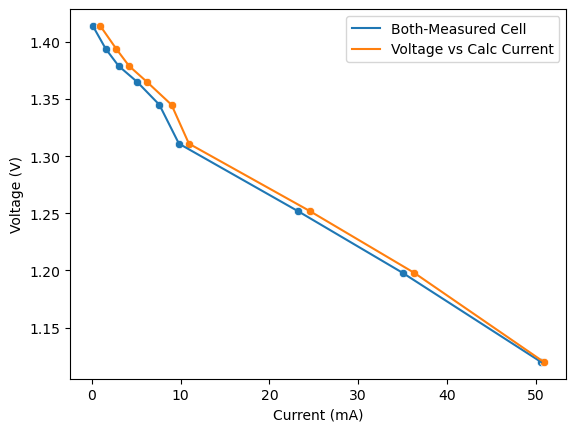

In [12]:
sns.lineplot(data=both_cell_2_14, x='Current (mA)', y='Voltage (V)', label='Both-Measured Cell')
sns.scatterplot(data=both_cell_2_14, x='Current (mA)', y='Voltage (V)')
sns.lineplot(data=both_cell_2_14, x='Calc Current (mA)', y='Voltage (V)', label='Voltage vs Calc Current')
sns.scatterplot(data=both_cell_2_14, x='Calc Current (mA)', y='Voltage (V)');

# Polarization Curves - 02/21/2024

same as 2/14 only doing lower resistances

In [13]:
resistances_2_21 = [51,22,10,5.1,1]
runs_to_resistance_2_21 = dict(zip(np.array(['Run'+str(i) for i in np.arange(1,len(resistances_2_21)+1)]), resistances_2_21))
both_cell_2_21 = pd.DataFrame(data={'Run':runs_to_resistance_2_21.keys(),
                                       'Resistance (Ohms)':runs_to_resistance_2_21.values(),
                                       'Voltage (V)':[1.387,1.235,1.102, 1.001, 0.611],
                                    'Current (A)':[0.0268,0.0561,0.1081,0.1869,0.4857]})
both_cell_2_21['Current (mA)'] = both_cell_2_21['Current (A)'] * 1000
both_cell_2_21['Calc Current (mA)'] = both_cell_2_21['Voltage (V)'] / both_cell_2_21['Resistance (Ohms)'] * 1000
both_cell_2_21['Calc Voltage (V)'] = both_cell_2_21['Current (A)'] * both_cell_2_21['Resistance (Ohms)']
voltage_only_cell_2_21 = pd.DataFrame(data={'Run':runs_to_resistance_2_21.keys(),
                                       'Resistance (Ohms)':runs_to_resistance_2_21.values(),
                                       'Voltage (V)':[1.362,1.233,1.042,0.850,0.624]})
voltage_only_cell_2_21['Current (A)'] = voltage_only_cell_2_21['Voltage (V)'] / voltage_only_cell_2_21['Resistance (Ohms)']
voltage_only_cell_2_21['Current (mA)'] = voltage_only_cell_2_21['Current (A)'] * 1000

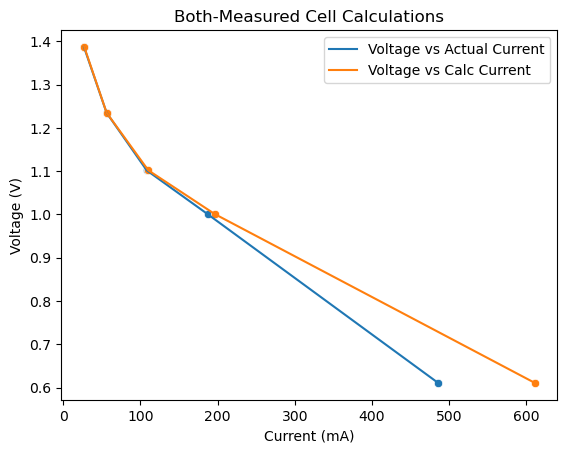

In [14]:
sns.lineplot(data=both_cell_2_21, x='Current (mA)', y='Voltage (V)', label='Voltage vs Actual Current')
sns.scatterplot(data=both_cell_2_21, x='Current (mA)', y='Voltage (V)')
sns.lineplot(data=both_cell_2_21, x='Calc Current (mA)', y='Voltage (V)', label='Voltage vs Calc Current')
sns.scatterplot(data=both_cell_2_21, x='Calc Current (mA)', y='Voltage (V)')
plt.title('Both-Measured Cell Calculations');

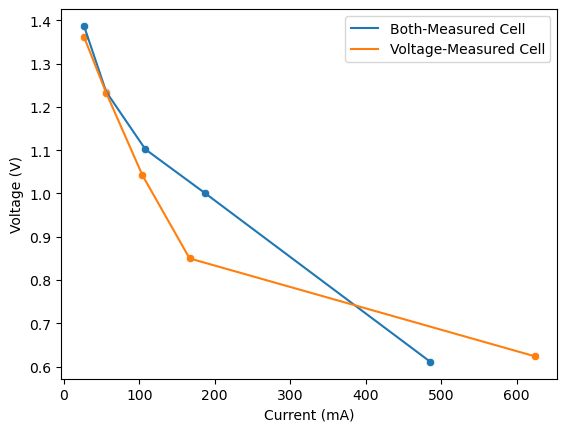

In [15]:
sns.lineplot(data=both_cell_2_21, x='Current (mA)', y='Voltage (V)', label='Both-Measured Cell')
sns.scatterplot(data=both_cell_2_21, x='Current (mA)', y='Voltage (V)')
sns.lineplot(data=voltage_only_cell_2_21, x='Current (mA)', y='Voltage (V)', label='Voltage-Measured Cell')
sns.scatterplot(data=voltage_only_cell_2_21, x='Current (mA)', y='Voltage (V)');

Plotting 2/7, 2/14, 2/21, Both-Measured Cell (Voltage vs Actual Current)

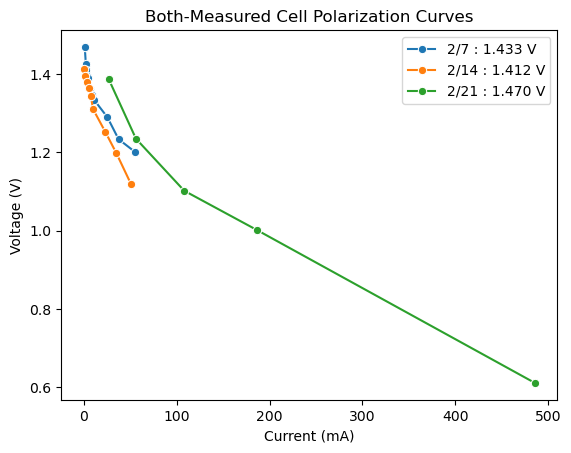

In [16]:
sns.lineplot(voltage_cell_2_17, x='Current (mA)',y='Voltage (V)', label = '2/7 : 1.433 V', marker='o')
sns.lineplot(both_cell_2_14, x='Current (mA)',y='Voltage (V)', label ='2/14 : 1.412 V', marker = 'o')
sns.lineplot(both_cell_2_21, x='Current (mA)',y='Voltage (V)', label = '2/21 : 1.470 V', marker = 'o');
#plt.xlim(0,200)
plt.title('Both-Measured Cell Polarization Curves');